In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
matches=pd.read_csv('matches.csv')   
delivery=pd.read_csv('deliveries.csv')
matches.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


#Some Cleaning And Transformation

In [5]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [6]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

#Some Basic Analysis

In [8]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'Delhi Capitals']


In [9]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 32

Total umpires  61


In [10]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [11]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['Season','team1','team2','winner','win_by_runs']]

,Season,team1,team2,winner,win_by_runs
43,IPL-2017,MI,DD,MI,146


In [12]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['Season','team1','team2','winner','win_by_wickets']]

,Season,team1,team2,winner,win_by_wickets
2,IPL-2017,GL,KKR,KKR,10


#Toss Decisions

In [13]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    80.242634
bat      50.779896
Name: toss_decision, dtype: float64


#Toss Decisions across Seasons

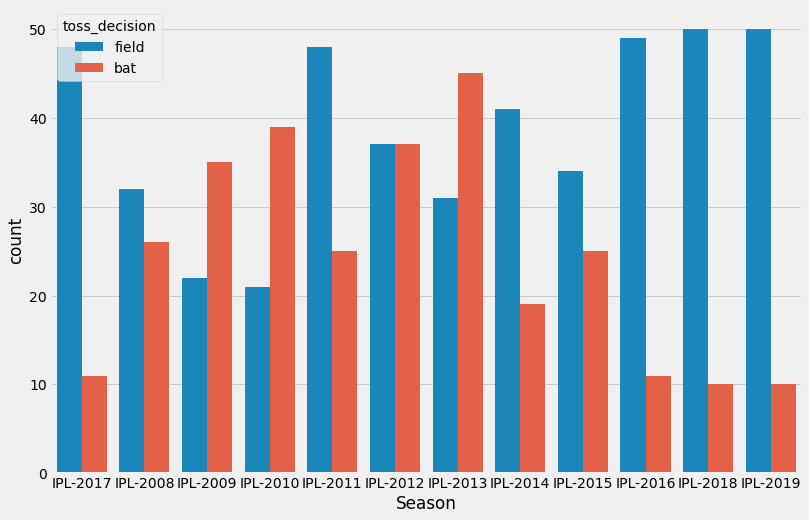

In [73]:
mlt.subplots(figsize=(12,8))
sns.countplot(x='Season',hue='toss_decision',data=matches)
mlt.savefig("C:/Users/Umraz/Desktop/plt/Toss_Decision.jpg",dpi=300)

mlt.show()

#Maximum Toss Winners

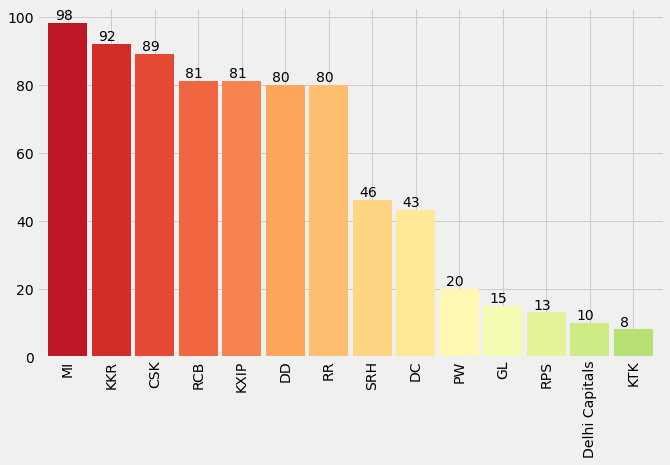

In [74]:
#Maximum Toss Winners

mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.savefig("C:/Users/Umraz/Desktop/plt/Max_toss_winner.jpg",dpi=300)

mlt.show()

#Total Matches vs Wins for Teams 

In [16]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

#Is Toss Winner Also the Match Winner.?

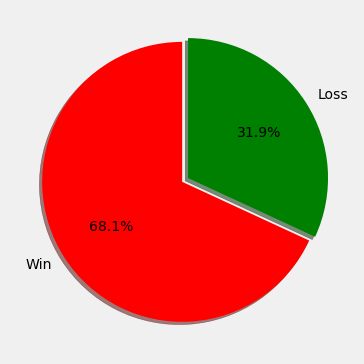

In [75]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['Win','Loss']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.savefig("C:/Users/Umraz/Desktop/plt/toss_and_match_win.jpg",dpi=300)

mlt.show()

#Matches played across each season

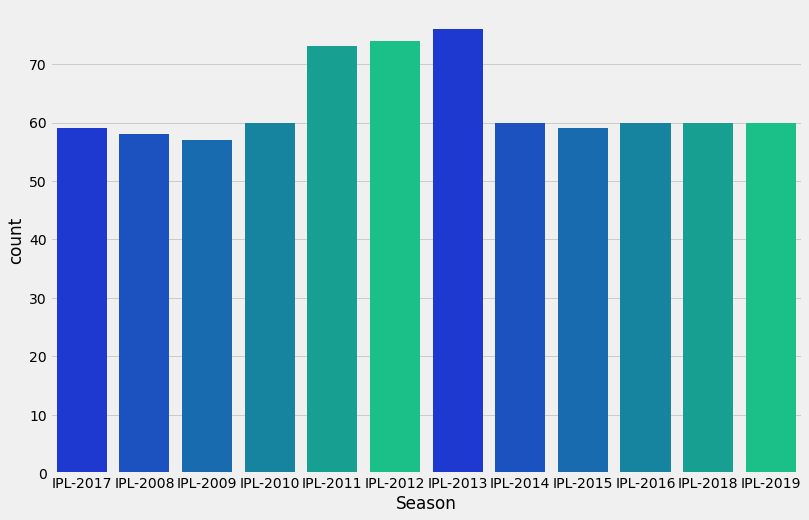

In [76]:
mlt.subplots(figsize=(12,8))
sns.countplot(x='Season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.savefig("C:/Users/Umraz/Desktop/plt/matches_played_in_season.jpg",dpi=300)

mlt.show()


#Runs Across the Seasons

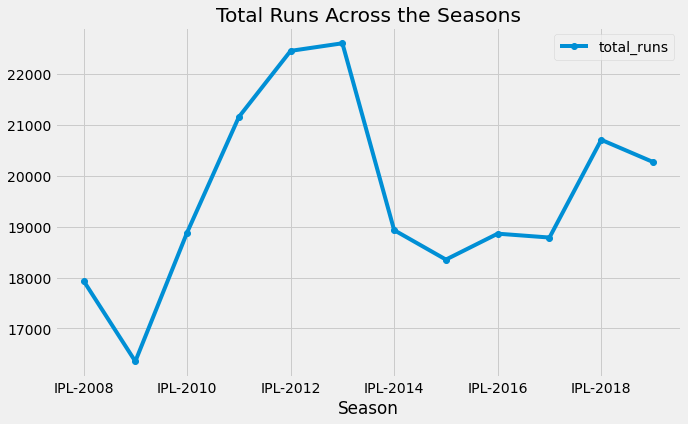

In [77]:
batsmen = matches[['id','Season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.savefig("C:/Users/Umraz/Desktop/plt/run_across_season.jpg",dpi=300)

mlt.show()

#Average runs per match in each Season

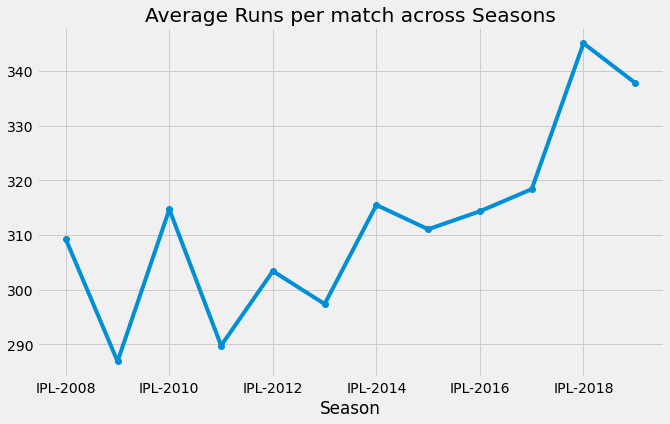

In [78]:
avgruns_each_season=matches.groupby(['Season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('Season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.savefig("C:/Users/Umraz/Desktop/plt/Avg_run.jpg",dpi=300)

mlt.show()

#Sixes and Fours Across the Season

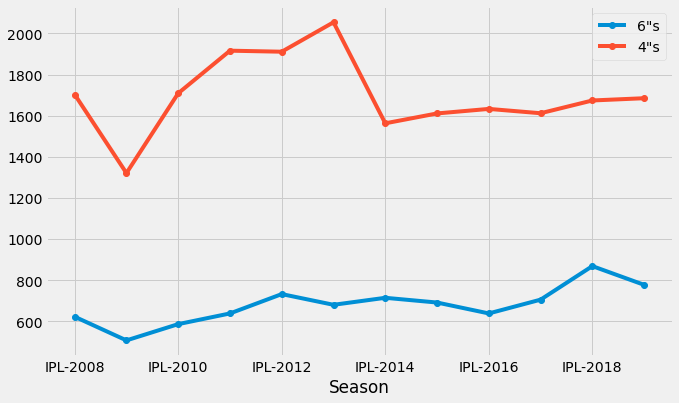

In [79]:
Season_boundaries=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='Season',right_on='Season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('Season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.savefig("C:/Users/Umraz/Desktop/plt/six_four.jpg",dpi=300)

mlt.show()

#Runs Per Over By Teams Across Seasons

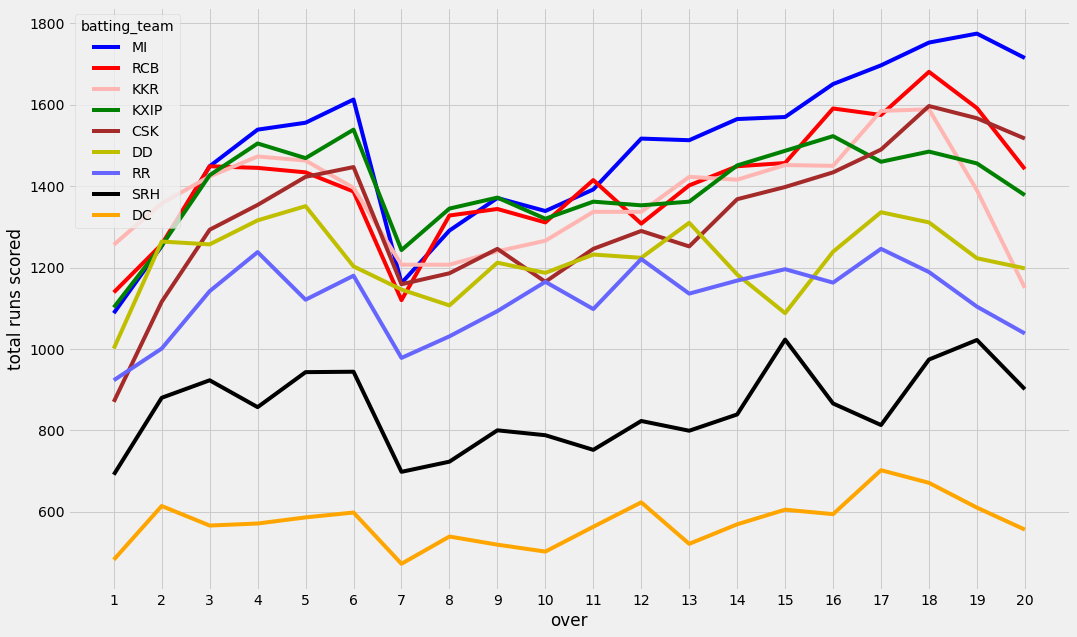

In [80]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.savefig("C:/Users/Umraz/Desktop/plt/Run_per_over.jpg",dpi=300)

mlt.show()

#Favorite Grounds

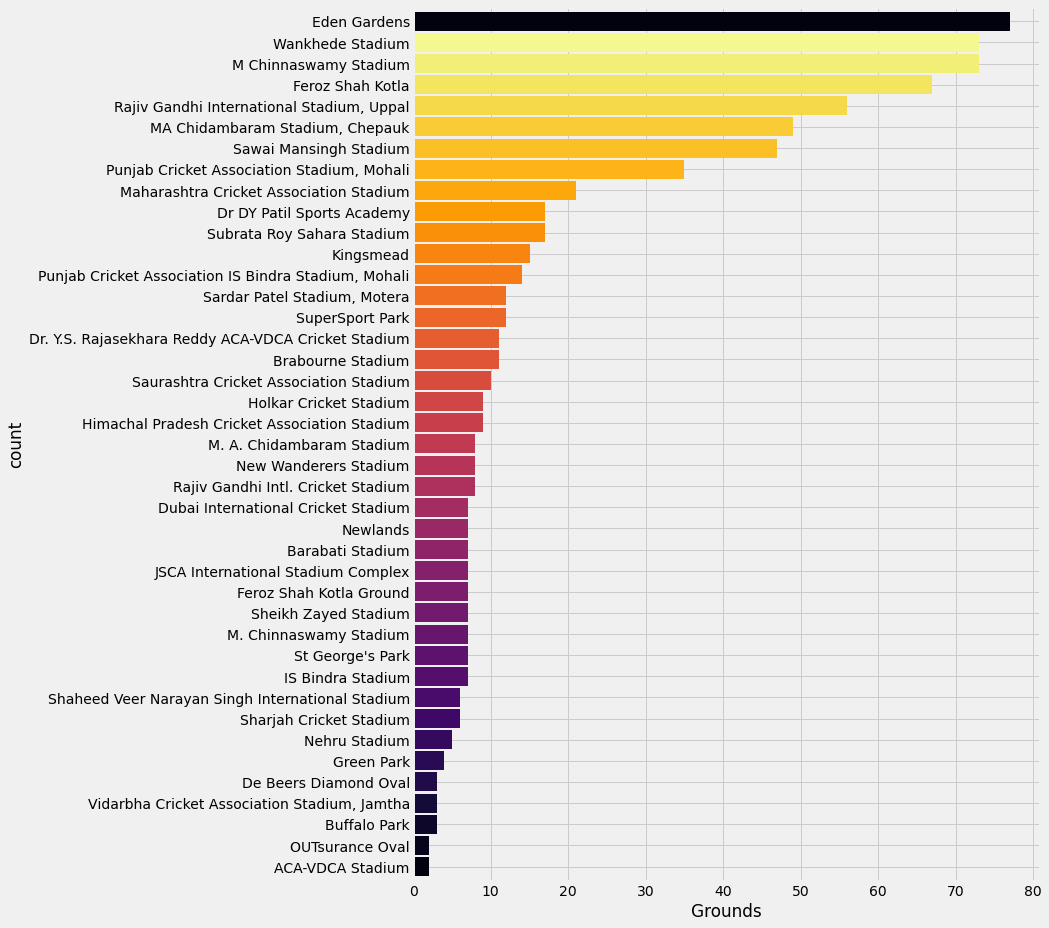

In [81]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.savefig("C:/Users/Umraz/Desktop/plt/Fav_ground.jpg",dpi=300)

mlt.show()

#Maximum Man Of Matches

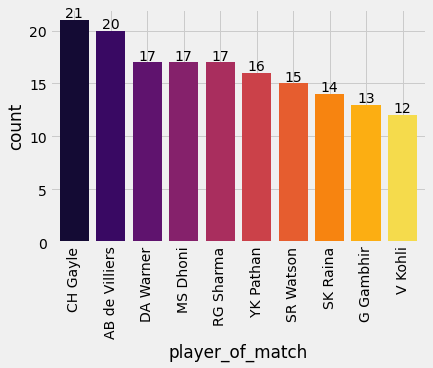

In [82]:
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.savefig("C:/Users/Umraz/Desktop/plt/most_man_of_d_match.jpg",dpi=300)

mlt.show()

#Super Over!

In [25]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [26]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['PW', 'RPS', 'KTK', 'DC']


#Favorite Umpires

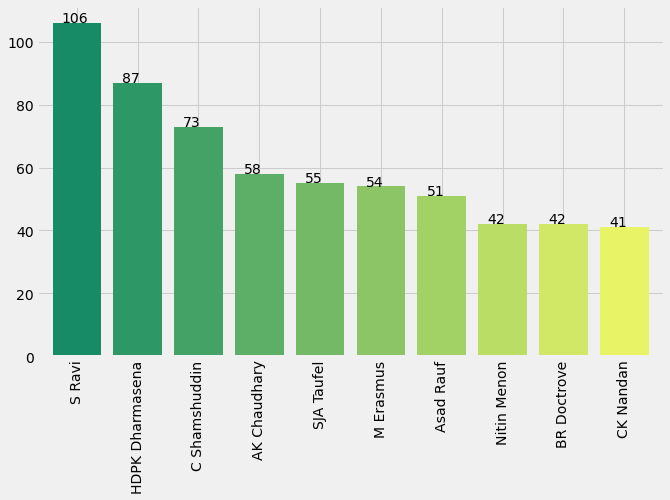

In [83]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.savefig("C:/Users/Umraz/Desktop/plt/Fav_umpire.jpg",dpi=300)

mlt.show()

#MI vs KKR

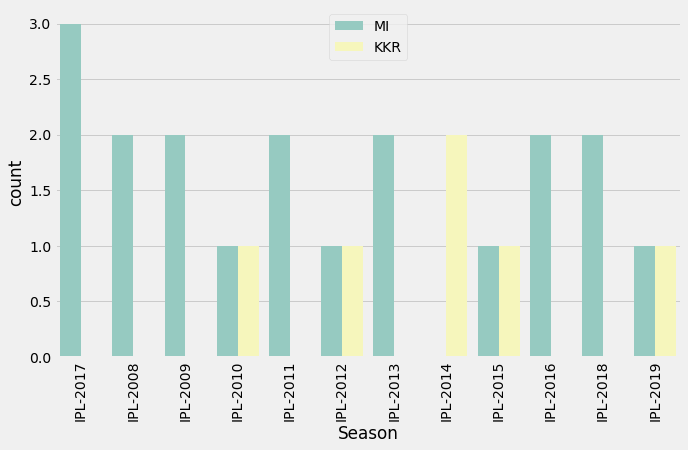

In [85]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='Season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.savefig("C:/Users/Umraz/Desktop/plt/MI_KKR.jpg",dpi=300)
    mlt.show()
team1_vs_team2('KKR','MI')

#MI vs CSK

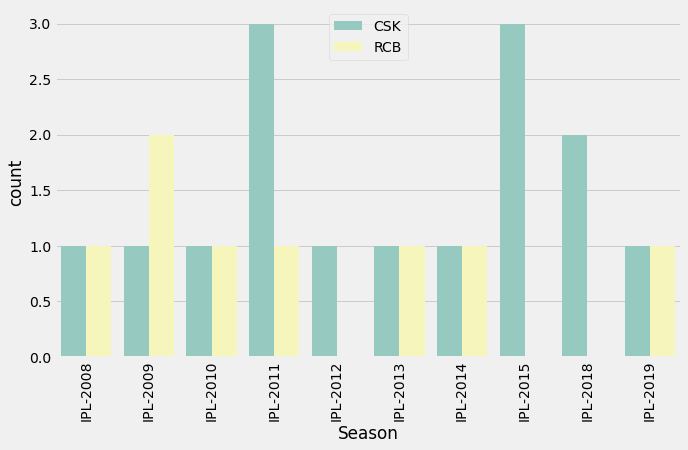

In [84]:
team1_vs_team2('CSK','RCB')

#Matches Won By A Team Against Other Teams

In [30]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')

        MI  KKR
winner  19    6
        MI  RCB
winner  16    9
        MI  DC
winner   6   4
        MI  CSK
winner  17   11
        MI  RR
winner  10  10
        MI  DD
winner  11  11
        GL  MI
winner   2   2
        MI  KXIP
winner  13    11
        MI  SRH
winner   7    7
        RPS  MI
winner    4   2
        KTK
winner    1
        MI  PW
winner   5   1


#Score Distribution For Teams by Innings

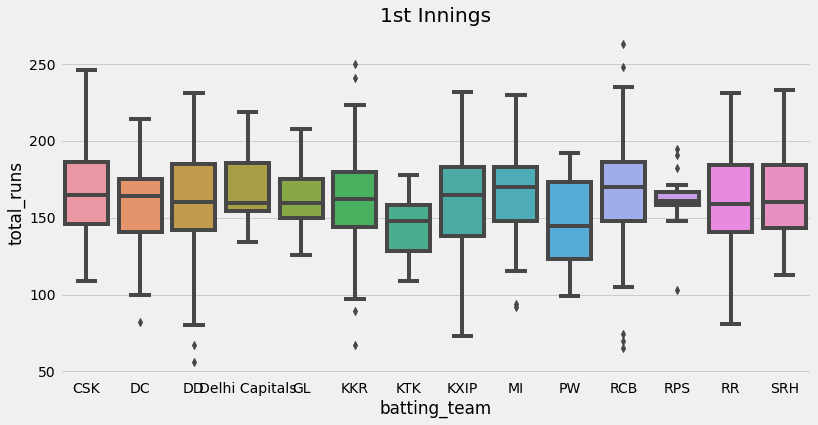

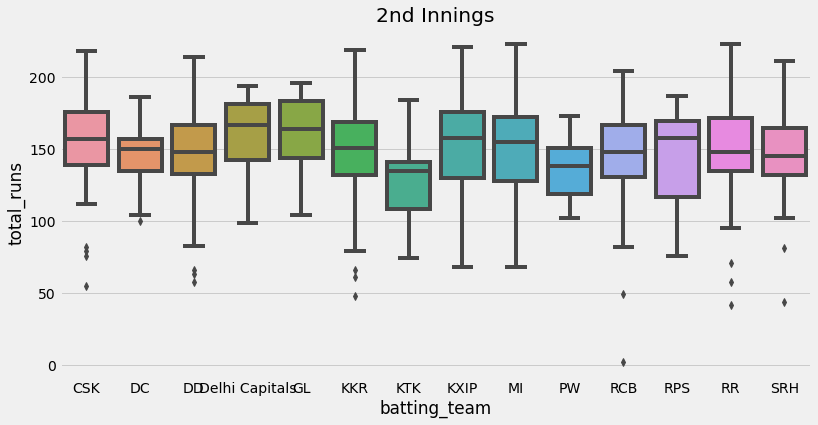

In [86]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.savefig("C:/Users/Umraz/Desktop/plt/Score_distribution.jpg",dpi=300)

mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

#200+ Scores

In [32]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


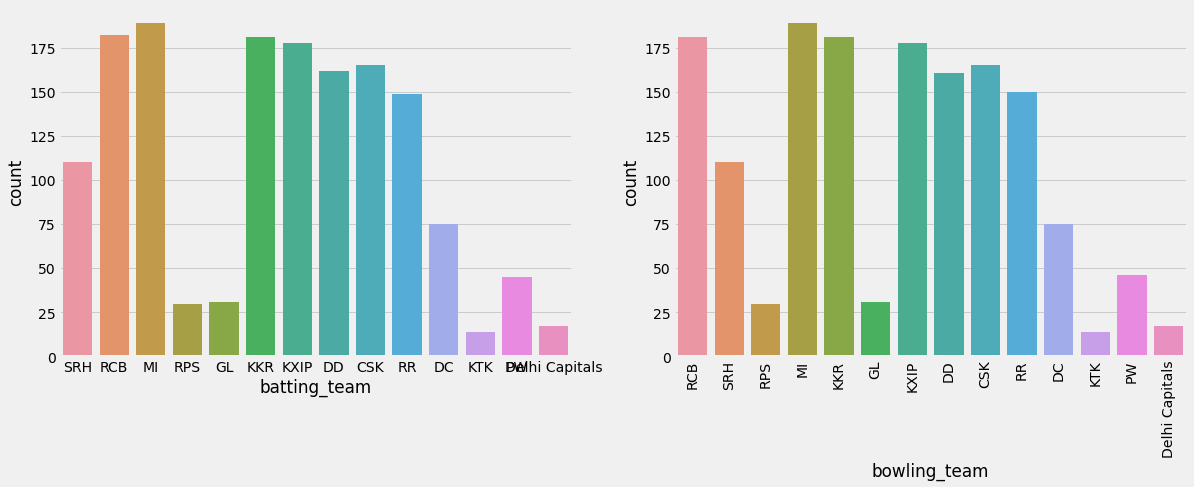

In [87]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.savefig("C:/Users/Umraz/Desktop/plt/11.jpg",dpi=300)

mlt.show()



In [34]:
print('Teams who have"nt ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who haven"t conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have"nt ever scored 200 runs ['PW', 'RPS', 'KTK']
Teams who haven"t conceeded over 200 while bowling ['KTK']


In [35]:
high=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                2
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
...                                 ...
2      RR           CSK               1
                    DC                1
                    MI                1
       SRH          RCB               1
                    RR                1

[72 rows x 1 columns]

In [36]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


#Chances of chasing 200+ target

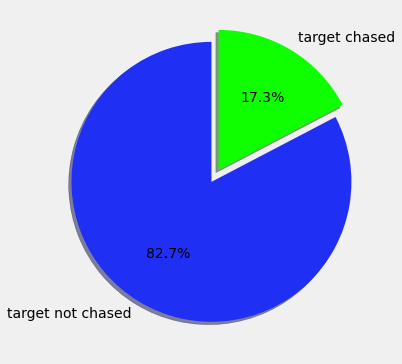

In [88]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.savefig("C:/Users/Umraz/Desktop/plt/200+.jpg",dpi=300)

mlt.show()

##Batsman Comparator

In [38]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


C:\Users\Umraz\Anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



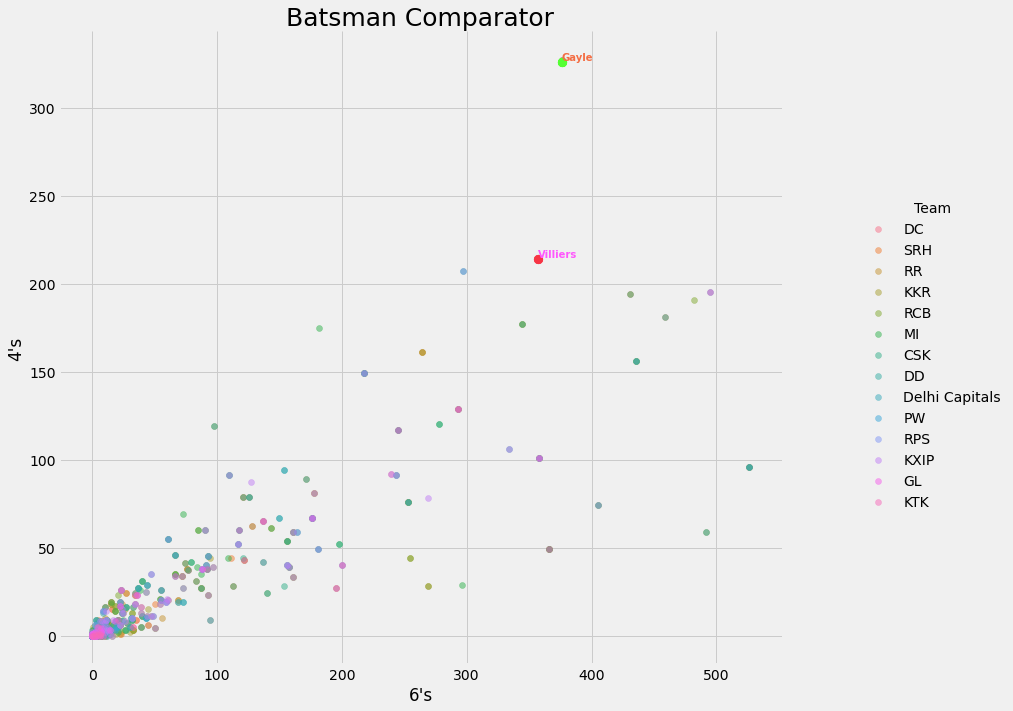

In [89]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator',size=25)
    mlt.savefig("C:/Users/Umraz/Desktop/plt/bats_mans.jpg",dpi=300)

    mlt.show()

batsman_comparator("6's","4's",'Gayle','Villiers') #comparing gayle and de-villiers based on their respective boundaries

##Dhoni Vs Kohli

C:\Users\Umraz\Anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



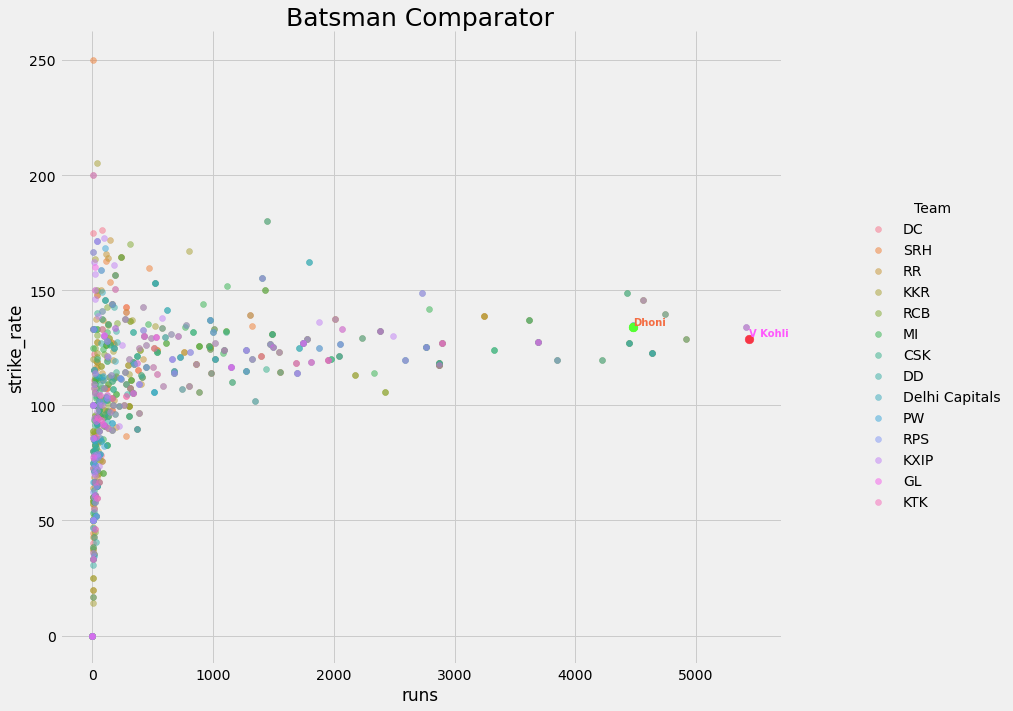

In [40]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

#Top Batsman

#Top 10 Batsman

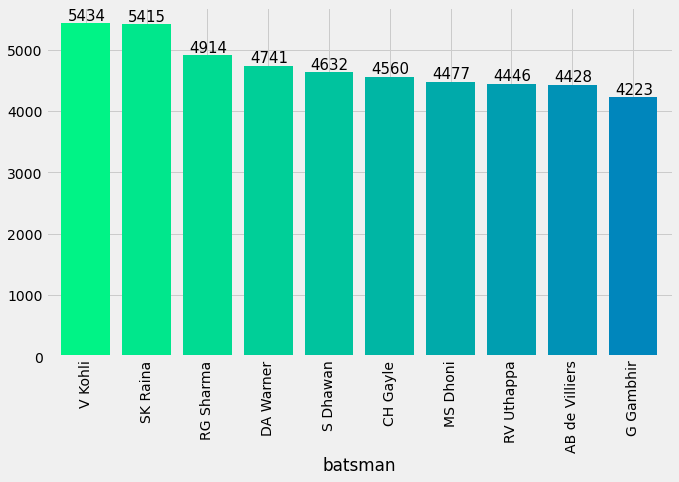

In [90]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.savefig("C:/Users/Umraz/Desktop/plt/Top10_bats_man.jpg",dpi=300)

mlt.show()

##Top Batsman's with 1's, 2's, 3's, 4's

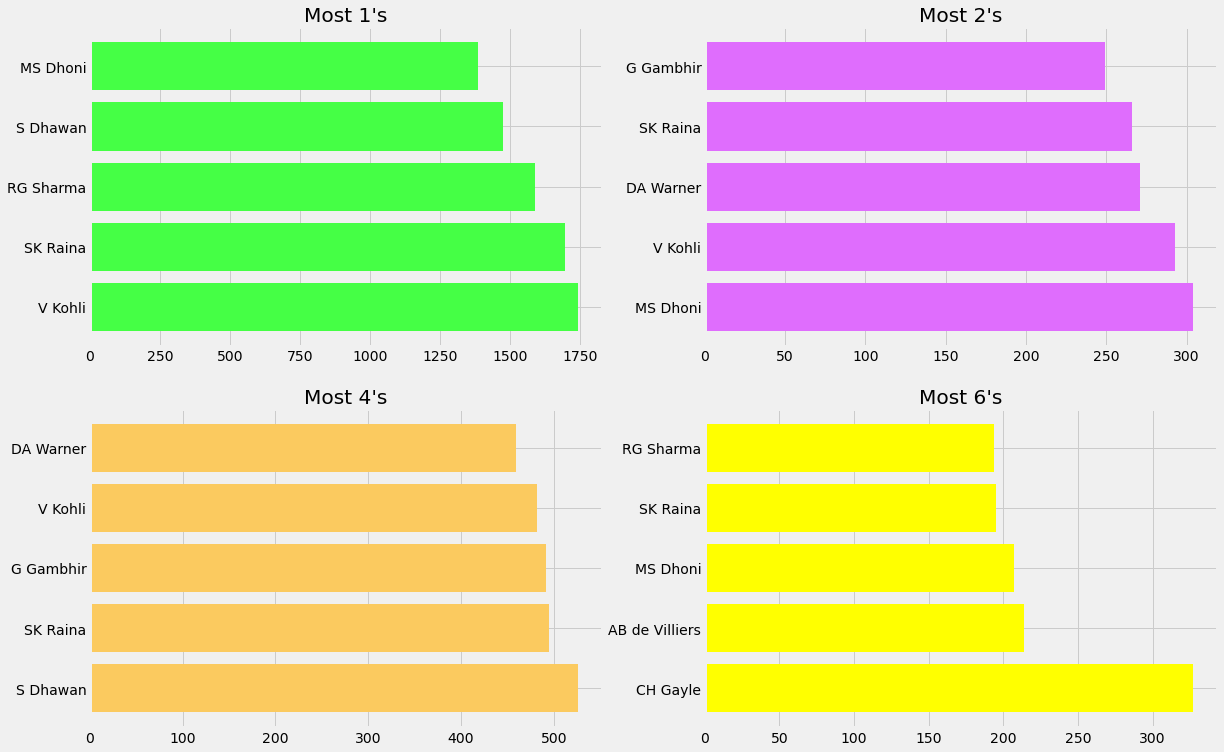

In [71]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.savefig("C:/Users/Umraz/Desktop/plt/runs.jpg",dpi=300)

mlt.show()

#Top Individual Scores

In [43]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


#Individual Scores By Top Batsman each Inning

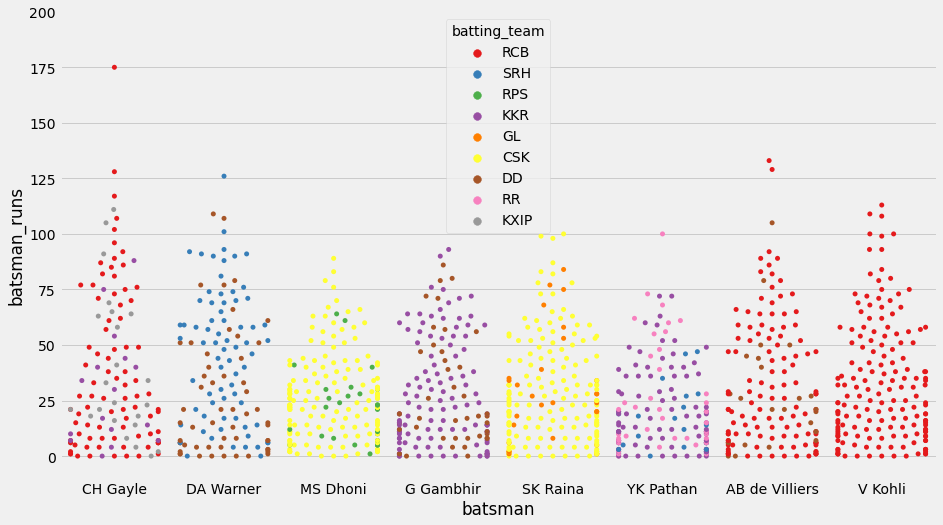

In [91]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.savefig("C:/Users/Umraz/Desktop/plt/Indivi_score.jpg",dpi=300)
mlt.show()



#Runs Scored By Batsman Across Seasons

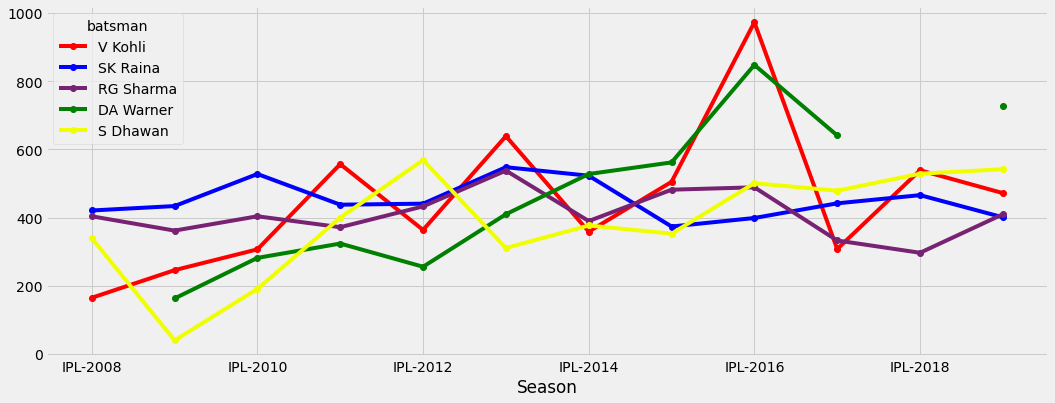

In [92]:
a=batsmen.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['Season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.savefig("C:/Users/Umraz/Desktop/plt/total_score.jpg",dpi=300)

mlt.show()



#How do the top batsmen score? (INTERACTIVE)

In [46]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot('batsman','type','count')

trace1 = go.Bar(
    y=c.index, x=c[6],
    name="6's",
    orientation = 'h',
    marker = dict(color = 'rgba(178, 78, 139, 0.6)',
        line = dict(color = 'rgba(178, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=c.index, x=c[4],
    name="4's",
    orientation = 'h',
    marker = dict(color = 'rgba(58, 71, 80, 0.6)',
        line = dict(color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=c.index, x=c[2],
    name="2's",
    orientation = 'h',
    marker = dict(color = 'rgba(101, 178, 139, 0.6)',
        line = dict(color = 'rgba(101, 178, 139, 1.0)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=c.index, x=c[1],
    name="1's",
    orientation = 'h',
    marker = dict(color = 'rgba(208, 105, 80, 0.6)',
        line = dict(color = 'rgba(208, 105, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

#Frequency of Scores

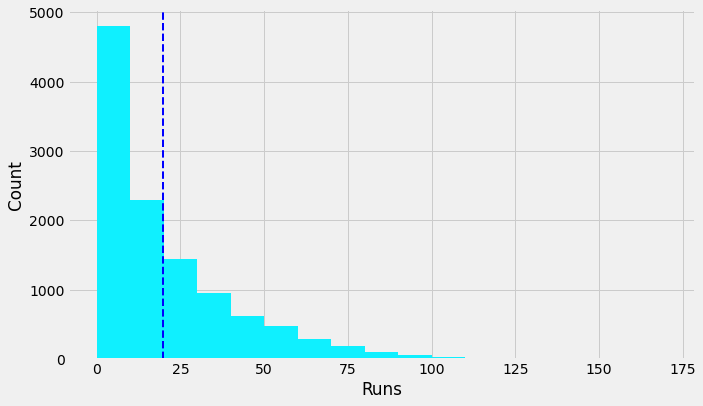

In [93]:
mlt.subplots(figsize=(10,6))
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.savefig("C:/Users/Umraz/Desktop/plt/Friquency_score.jpg",dpi=300)

mlt.show()

#Orange Caps Each Season(Highest Run Getter per Season) (INTERACTIVE)

In [48]:
orange=matches[['id','Season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["Season"],keep="first")
orange.sort_values(by='Season')

trace1 = go.Bar(
    x=orange['Season'].values,
    y=orange['batsman_runs'].values,
    name='Total Matches',
    text=orange['batsman'].values,
    marker=dict(
        color='rgb(255,140,0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Orange-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

#Highest Wicket Taker

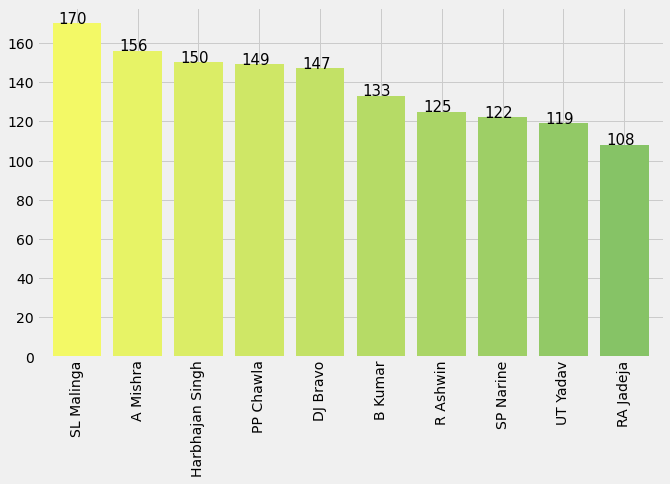

In [94]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.savefig("C:/Users/Umraz/Desktop/plt/highest_score.jpg",dpi=300)

mlt.show()

#Maximum Overs

In [50]:
eco=delivery.groupby(['bowler']).sum()
eco['total balls']=delivery['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


#Most Economical Bowlers with 300+ overs

In [51]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,DW Steyn,R Ashwin,SP Narine,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.68665,6.75498,6.78753,7.04348,7.09293,7.23725,7.29167,7.40432,7.54617,7.61276


#Top 20 Bowlers (INTERACTIVE)

In [52]:
bowlers=delivery.groupby('bowler').sum().reset_index()
bowl=delivery['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers.head()

,bowler,runs_given,overs,wickets,economy
7,A Mishra,3850,528,156.0,7.291667
9,A Nehra,2537,329,106.0,7.711246
53,B Kumar,3264,451,133.0,7.237251
93,DJ Bravo,3733,451,147.0,8.277162
108,DW Steyn,2454,367,96.0,6.686649


In [53]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode='markers',
    marker=dict(
        size= bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Top 20 Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers'
    ),
    yaxis=dict(
        title= 'Wickets Taken',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

#Frequency Of Economy

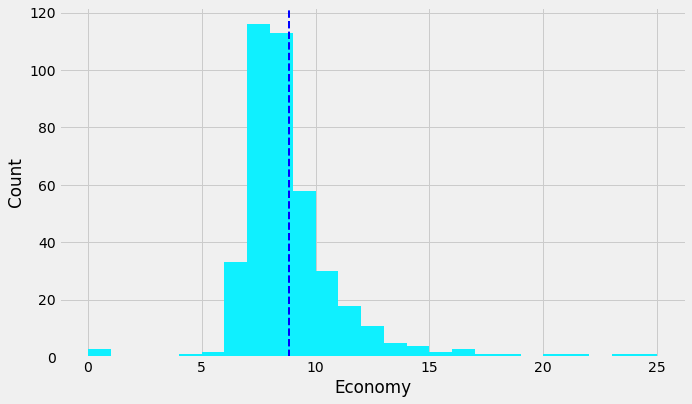

In [54]:
mlt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
mlt.hist(eco['economy'],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Economy')
mlt.ylabel('Count')
mlt.axvline(eco["economy"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

#Purple Caps Each Season (Maximum Wickets By Bowler per Season) (INTERACTIVE)

In [55]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(matches,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['Season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('Season',keep='first').sort_values(by='Season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(
    x=purple['Season'].values,
    y=purple['count_wickets'].values,
    name='Total Matches',
    text=purple['bowler'].values,
    marker=dict(
        color='rgb(75,0,130)',
        line=dict(
            color='rgb(108,148,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Purple-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

#Extras And Wickets (INTERACTIVE)

In [98]:
extras=['wide_runs','bye_runs','legbye_runs','noball_runs']
sizes=[5161,680,3056,612]

dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=delivery[delivery["dismissal_kind"].isin(dismiss)]
bx=ct.dismissal_kind.value_counts()[:10]
bx


fig = {
  "data": [
    {
      "values": sizes,
      "labels": extras,
      "domain": {"x": [0, .48]},
      "name": "Extra's",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": bx.values ,
      "labels": bx.index,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Wickets",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Extras Distribution and Types Of Wickets",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "EXTRA'S",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "WICKETS",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}


#Teams with maximum Boundaries

In [57]:
ax=delivery[delivery['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=delivery[delivery['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(204,12,28, 0.6)',
        line = dict(color = 'rgba(204,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,234,227, 0.6)',
        line = dict(color = 'rgba(9, 227, 227, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

#How to win Finals??

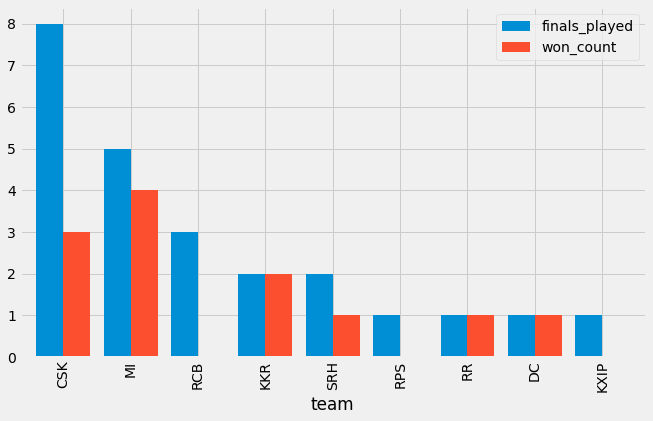

In [58]:
finals=matches.drop_duplicates(subset=['Season'],keep='last')
finals=finals[['id','Season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
mlt.gcf().set_size_inches(10,6)
mlt.show()

#Do Toss Winners Win Finals??

C:\Users\Umraz\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



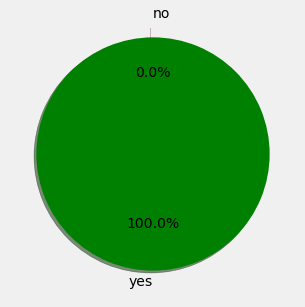

In [59]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(finals),(9-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

#Batting Or Fielding For Toss Winners

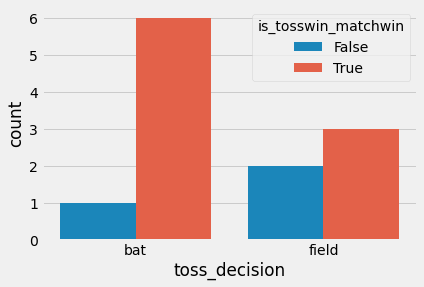

In [60]:
finals['is_tosswin_matchwin']=finals['toss_winner']==finals['winner']
sns.countplot(x='toss_decision',hue='is_tosswin_matchwin',data=finals)
mlt.show()